<a href="https://colab.research.google.com/github/romikumarsingh22/DriverDrowsiness/blob/main/Copy_of_boilerxgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install pandas numpy scikit-learn tensorflow joblib


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


df = pd.read_csv("/content/data_modified19.csv")


target = "Boiler outlet steam temperature"
X = df.drop(columns=["date", target])
y = df[target]


X = X.fillna(X.mean())
y = y.fillna(y.mean())


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


param_dist = {
    'max_depth': [16],
    'learning_rate': [0.05],
    'n_estimators': [100],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0],
    'reg_alpha': [0],
    'reg_lambda': [1]
}


xgb = XGBRegressor(objective='reg:squarederror', random_state=42)


random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=1,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train, y_train)


print("Best model and prediction")
best_model = random_search.best_estimator_
y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)


mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
test_r2 = r2_score(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)


print("Best Parameters:", random_search.best_params_)
print(f"✅ Train R² Score: {train_r2:.4f}")
print(f"✅ Test  R² Score: {test_r2:.4f}")
print(f"Test RMSE: {rmse:.4f}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best model and prediction
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 16, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
✅ Train R² Score: 0.9996
✅ Test  R² Score: 0.9929
Test RMSE: 0.3701


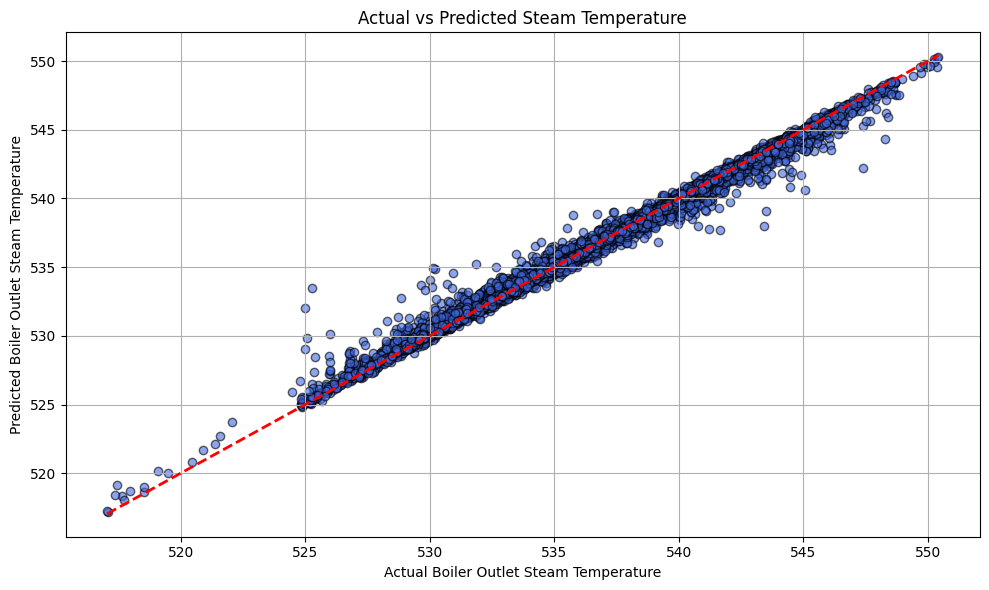

In [3]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='royalblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Boiler Outlet Steam Temperature')
plt.ylabel('Predicted Boiler Outlet Steam Temperature')
plt.title('Actual vs Predicted Steam Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_test, y_test_pred)

absolute_errors = np.abs(y_test - y_test_pred)
percentage_errors = (absolute_errors / y_test) * 100

min_abs_error = np.min(absolute_errors)
min_abs_index = np.argmin(absolute_errors)


min_perc_error = np.min(percentage_errors)
max_perc_error = np.max(percentage_errors)
min_perc_index = np.argmin(percentage_errors)
max_perc_index = np.argmax(percentage_errors)


print(f"\n📊 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📌 Minimum Absolute Error: {min_abs_error:.4f}")
print(f"📉 Minimum % Absolute Error: {min_perc_error:.4f}%")
print(f"📈 Maximum % Absolute Error: {max_perc_error:.4f}%")


print("\n🔍 Sample with MIN Absolute Error:")
print(f"Actual = {y_test.iloc[min_abs_index]:.4f}, Predicted = {y_test_pred[min_abs_index]:.4f}, Error = {absolute_errors.iloc[min_abs_index]:.4f}")

print("\n🔍 Sample with MIN % Error:")
print(f"Actual = {y_test.iloc[min_perc_index]:.4f}, Predicted = {y_test_pred[min_perc_index]:.4f}, % Error = {percentage_errors.iloc[min_perc_index]:.4f}%")

print("\n🔍 Sample with MAX % Error:")
print(f"Actual = {y_test.iloc[max_perc_index]:.4f}, Predicted = {y_test_pred[max_perc_index]:.4f}, % Error = {percentage_errors.iloc[max_perc_index]:.4f}%")



📊 Mean Absolute Error (MAE): 0.2079
📌 Minimum Absolute Error: 0.0000
📉 Minimum % Absolute Error: 0.0000%
📈 Maximum % Absolute Error: 1.5614%

🔍 Sample with MIN Absolute Error:
Actual = 539.8600, Predicted = 539.8600, Error = 0.0000

🔍 Sample with MIN % Error:
Actual = 539.8600, Predicted = 539.8600, % Error = 0.0000%

🔍 Sample with MAX % Error:
Actual = 525.2900, Predicted = 533.4920, % Error = 1.5614%
